# This code simulates the swing equation for a power grid example

Make sure to have dynamical_networks install using pip (pip install dynamical_networks)

This code is based on the model defined in: https://www.nature.com/articles/s41467-018-04287-5

In [6]:
from dynamical_networks.simulate.PG_network import PG_network
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

### Define all of the needed variables

In [7]:
t = np.linspace(0,12, 5000)
P_gen = 1.5
P_con = 1
K_0 = 1.63
I_0 = 1 
damping = 0.5
alpha = 0.6
V_gen = np.array([1, 4]) #vertices indices of generates and consumers
V_con = np.array([0, 2, 3])
A = np.array([[0, 1, 1, 0, 1],
              [1, 0, 1, 1, 0],
              [1, 1, 0, 1, 0],
              [0, 1, 1, 0, 1],
              [1, 0, 0, 1, 0]])


### The following block of code visualizes the network with green vertices as power generators and red vertices as power consumers

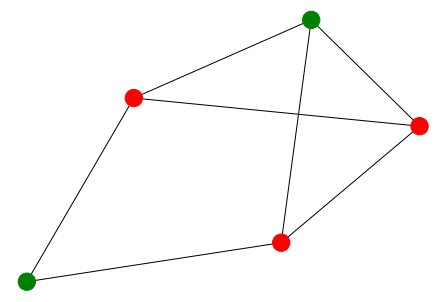

In [10]:
G = nx.convert_matrix.from_numpy_matrix(A)
pos = nx.spring_layout(G, k = 0.2, iterations = 500)
color_map = []
for node in G:
    if node in V_gen:
        color_map.append('green')
    else: 
        color_map.append('red') 
nx.draw(G, pos, node_color = color_map, width = 1)
plt.show()

### Run the simulation

In [11]:
Fs, E = PG_network(A, t, V_gen, V_con, K_0, P_gen, P_con, alpha, I_0, damping)

### Plot the Results

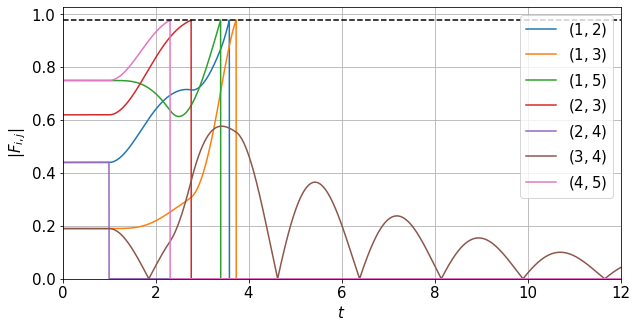

In [12]:
plt.figure(figsize = (10,5))
TextSize = 15
for i in range(len(Fs)):
    plt.plot(t, Fs[i], label = '$('+str(E[i][0]+1)+','+str(E[i][1]+1)+')$')
plt.plot([0,max(t)], [alpha*K_0, alpha*K_0], 'k--')

plt.grid()
plt.xlim(0,max(t))
plt.ylim(0,)
plt.xticks(size = TextSize)
plt.yticks(size = TextSize)
plt.xlabel(r'$t$', size = TextSize)
plt.ylabel(r'$|F_{i,j}|$', size = TextSize)
plt.legend(loc = 'upper right', fontsize = TextSize, ncol = 1)
plt.show()
    